In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('./warmupdata/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

In [4]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
df['classification'].value_counts()


classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [7]:
df = df[df['classification'].str.strip() != 'ckd\t']

In [8]:
df['classification'] = df['classification'].map({'ckd': 1, 'notckd': 0})

In [9]:
df['classification'].tail()

395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: classification, dtype: float64

In [10]:
df['classification'].value_counts()

classification
1.0    248
0.0    150
Name: count, dtype: int64

In [11]:
df['age'] = df['age'].fillna(df['age'].mean())
df['bp'] = df['bp'].fillna(df['bp'].mean())
df['sg'] = df['sg'].fillna(df['sg'].mean())
df['al'] = df['al'].fillna(df['al'].mean())
df['su'] = df['su'].fillna(df['su'].mean())
df['bgr'] = df['bgr'].fillna(df['bgr'].mean())
df['bu'] = df['bu'].fillna(df['bu'].mean())
df['sc'] = df['sc'].fillna(df['sc'].mean())
df['hemo'] = df['hemo'].fillna(df['hemo'].mean())
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['pcv'] = df['pcv'].fillna(df['pcv'].mean())

In [12]:
x= df[['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'hemo', 'pcv']]
y=df['classification']

In [13]:
x.isnull().sum()

age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
hemo    0
pcv     0
dtype: int64

In [14]:
y.isnull().sum()

np.int64(2)

In [15]:
y.value_counts()

classification
1.0    248
0.0    150
Name: count, dtype: int64

In [16]:
mask = (y == 0) | (y == 1)
x= x[mask]
y = y[mask]


In [17]:
x.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)


In [18]:
y.isnull().sum()

np.int64(0)

In [19]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [21]:
predict = model.predict(x_test)
predict

array([0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.])

In [22]:
accuracy=accuracy_score(y_test,predict)
accuracy

0.98

In [25]:
data = pd.DataFrame({'Actual':y_test.values, 'predicted':predict.flatten()})
data.head()

,Actual,predicted
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


<Axes: >

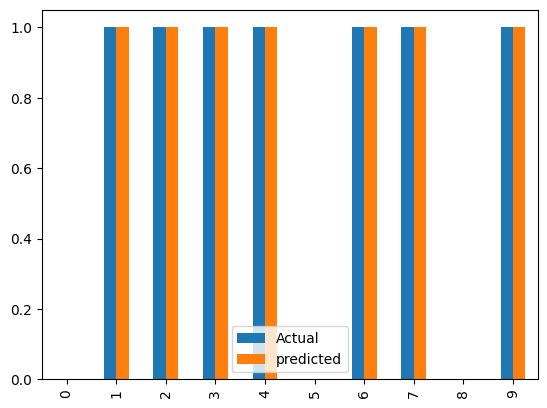

In [26]:
graph  = data.head(10)
graph.plot(kind='bar')

In [23]:
model.score(x_train,y_train)

0.9797979797979798

In [24]:
model.score(x_test,y_test)

0.98

In [ ]:
import pickle
with open("kidney_model.pkl", "wb") as f:
    pickle.dump(model,f)

In [29]:
with open("kindney_graph.pkl", "wb") as f:
    pickle.dump(graph,f)